<a href="https://colab.research.google.com/github/davidayariga/APPDEV/blob/main/diabetes_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("/content/data.csv")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [3]:
# Compute mean values
mean_values = df.mean()

# Compute variance values
variance_values = df.var()

# Display mean and variance
print("Mean values:")
print(mean_values)

print("\nVariance values:")
print(variance_values)

Mean values:
AGE     45.125000
SEX      1.458333
BMI     25.912500
BP      94.444583
S1     183.750000
S2     111.500000
S3      49.958333
S4       3.856250
S5       4.527754
S6      86.041667
Y      135.583333
dtype: float64

Variance values:
AGE     250.288043
SEX       0.259058
BMI      14.017663
BP      110.946313
S1     1020.108696
S2      945.885217
S3      132.650362
S4        1.556807
S5        0.338070
S6      124.215580
Y      3930.166667
dtype: float64


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

Text(0.5, 1.0, 'Disease Progression (Y) by Gender')

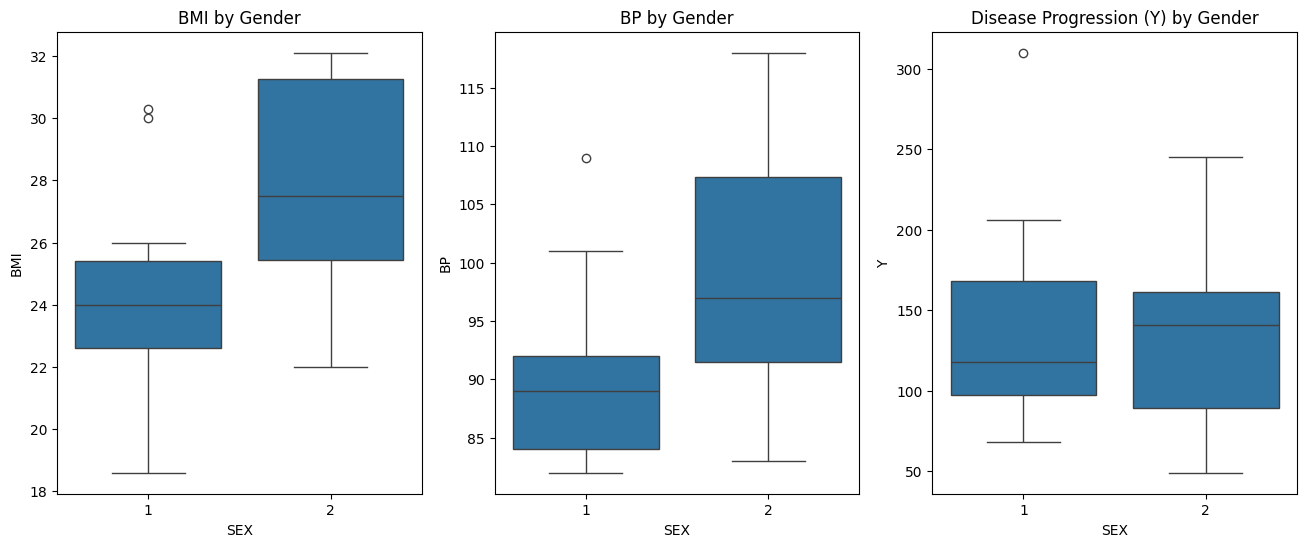

In [18]:
# Boxplots for BMI, BP, and Y depending on gender
plt.figure(figsize=(16, 6))

# Boxplot for BMI by gender
plt.subplot(1, 3, 1)
sns.boxplot(x='SEX', y='BMI', data=df)
plt.title("BMI by Gender")

# Boxplot for BP by gender
plt.subplot(1, 3, 2)
sns.boxplot(x='SEX', y='BP', data=df)
plt.title("BP by Gender")

# Boxplot for Y (disease progression) by gender
plt.subplot(1, 3, 3)
sns.boxplot(x='SEX', y='Y', data=df)
plt.title("Disease Progression (Y) by Gender")

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

Text(0.5, 1.0, 'Disease Progression (Y) Distribution')

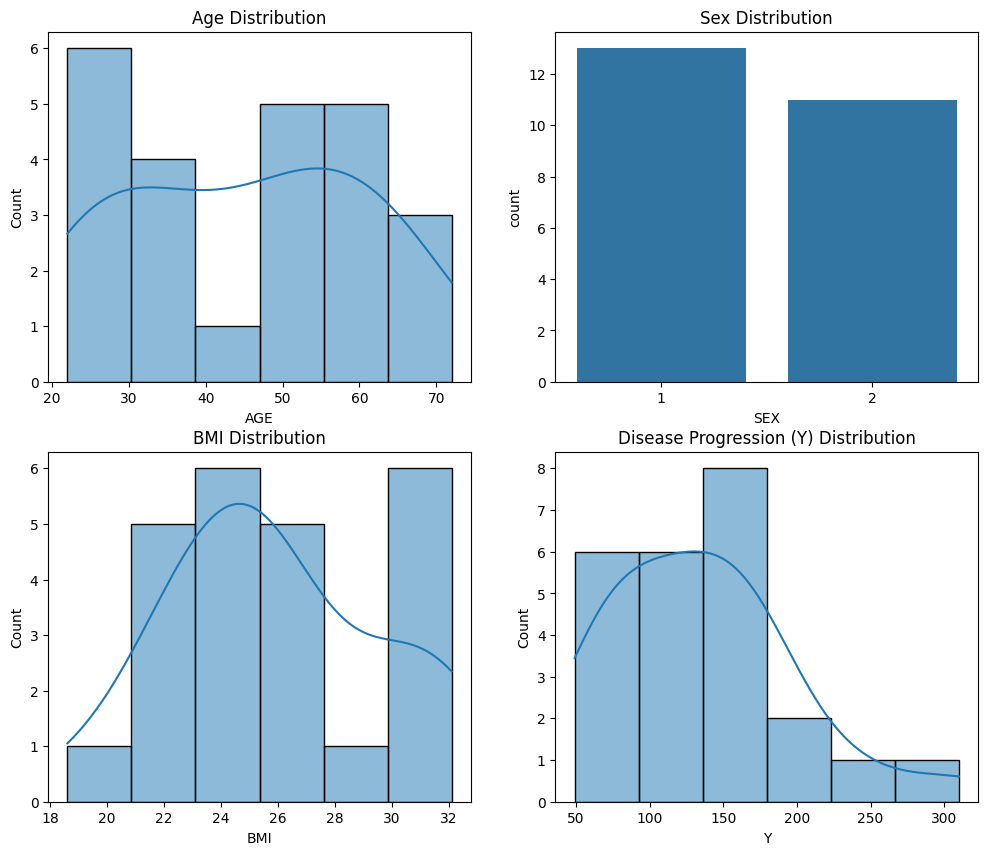

In [13]:
# Distribution of Age, Sex, BMI, and Y variables
plt.figure(figsize=(12, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['AGE'], kde=True)
plt.title('Age Distribution')

# Sex distribution
plt.subplot(2, 2, 2)
sns.countplot(x='SEX', data=df)
plt.title('Sex Distribution')

# BMI distribution
plt.subplot(2, 2, 3)
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')

# Y (disease progression) distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Y'], kde=True)
plt.title('Disease Progression (Y) Distribution')


### Task 4: Test the correlation between different variables and disease progression (Y)


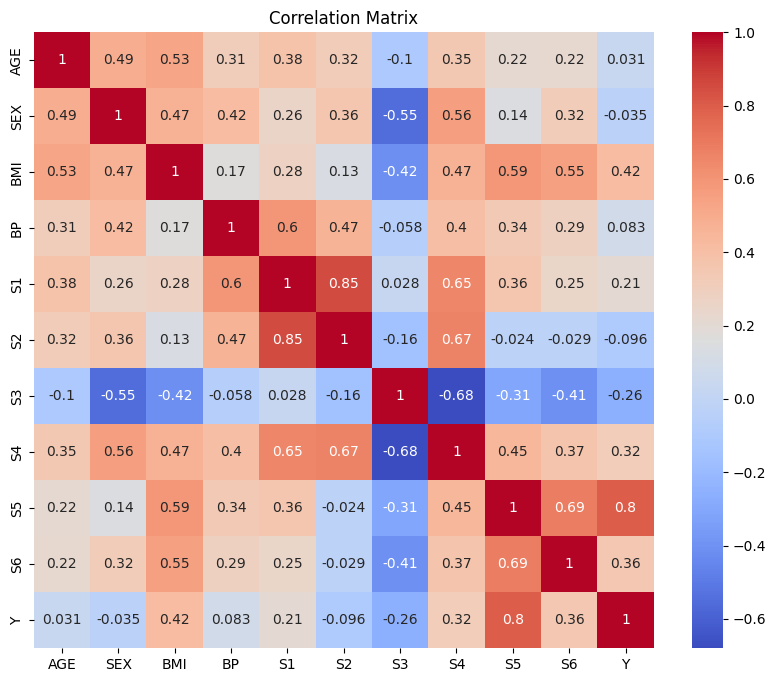


Correlation with Disease Progression (Y):
Y      1.000000
S5     0.802665
BMI    0.419975
S6     0.356026
S4     0.315946
S1     0.207056
BP     0.083455
AGE    0.031486
SEX   -0.034633
S2    -0.095536
S3    -0.255281
Name: Y, dtype: float64


In [14]:
# Correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check correlation of all variables with disease progression (Y)
correlation_with_Y = correlation_matrix['Y'].sort_values(ascending=False)
print("\nCorrelation with Disease Progression (Y):")
print(correlation_with_Y)

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [17]:
# Split the data by gender
men = df[df['SEX'] == 1]['Y']
women = df[df['SEX'] == 2]['Y']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(men, women)

t_stat, p_value


(0.16253943370564095, 0.8723647800935618)

The independent two-sample t-test results are as follows:

t-statistic: 0.163

p-value: 0.872

Since the p-value is much greater than the common significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in the degree of diabetes progression between men and women.